In [19]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt
import scipy
import PIL as image

from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [20]:
gen = ImageDataGenerator(rotation_range = 30, 
                         width_shift_range = 0.3, 
                         shear_range = 0.4, 
                         horizontal_flip = True)

In [21]:
img_array_list = []
img_names = ['./cleansing_data/cat_sample.jpg',
             './cleansing_data/mask.png',
             './cleansing_data/sample.JPG',
             './cleansing_data/my_red_img.jpg']

for i in range(len(img_names)):
    loaded_img = load_img(img_names[i], target_size = (28,28))
    loaded_img_array = img_to_array(loaded_img)/255.0 
    
    img_array_list.append(loaded_img_array)

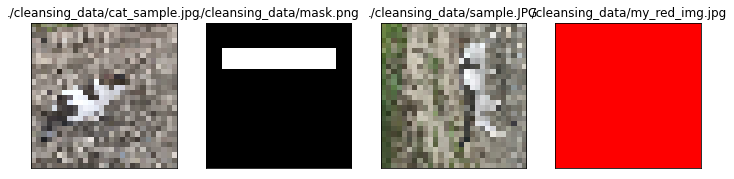

In [22]:
plt.figure(figsize=(12,12))
for i in range(len(img_array_list)):
    plt.subplot(1,len(img_array_list),i+1)
    plt.xticks([])
    plt.yticks([])
    plt.title(img_names[i])
    plt.imshow(img_array_list[i])

In [23]:
batch_siz=2

data_gen = gen.flow(np.array(img_array_list),batch_size=batch_siz)

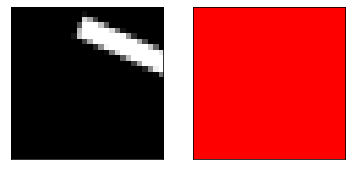

In [24]:
img = data_gen.next()

plt.figure(figsize=(6,6))
for i in range(len(img)):
    plt.subplot(1,len(img),i+1)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img[i])

In [31]:
datagen = ImageDataGenerator(
        rotation_range=30,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0,
        zoom_range=0.2,
        horizontal_flip=False,
        fill_mode='nearest')

img = load_img('./cleansing_data/cat_sample.jpg')  # PIL 이미지
x = img_to_array(img)  # (3, 150, 150) 크기의 NumPy 배열
x = x.reshape((1,) + x.shape)  # (1, 3, 150, 150) 크기의 NumPy 배열

# 아래 .flow() 함수는 임의 변환된 이미지를 배치 단위로 생성해서
# 지정된 `preview/` 폴더에 저장합니다.
i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir= 'test', save_prefix='', save_format='jpeg'):
    i += 1
    if i > 20:
        break  # 이미지 20장을 생성하고 마칩니다